In [ ]:
!pip install xgboost

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Data.csv')

In [ ]:
print(data.columns)

Index(['x1', 'x2', 'x3', 'x4', 'y'], dtype='object')


In [ ]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          x1        x2        x3        x4         y
x1  1.000000 -0.021450  0.512738 -0.082957 -0.323314
x2 -0.021450  1.000000 -0.001640  0.242546  0.233981
x3  0.512738 -0.001640  1.000000 -0.119711 -0.203877
x4 -0.082957  0.242546 -0.119711  1.000000  0.593559
y  -0.323314  0.233981 -0.203877  0.593559  1.000000


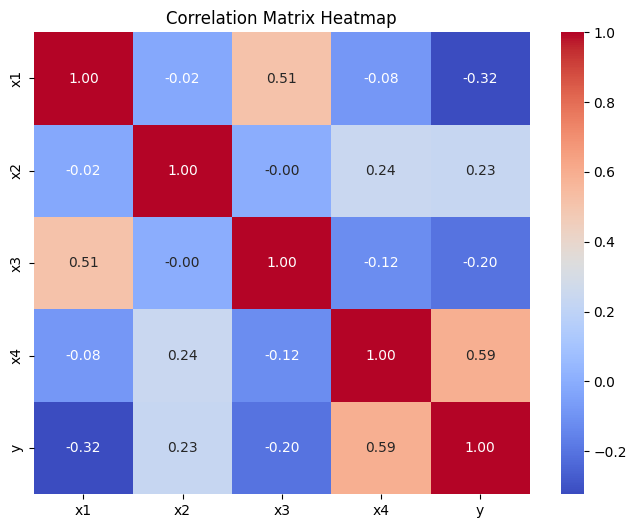

In [ ]:
# Displaying the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X = data[['x1', 'x2', 'x3', 'x4']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

In [ ]:
# Fit the model to the training set
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Predict on the test set
preds = xg_reg.predict(X_test)

In [ ]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % rmse)

RMSE: 0.156104


In [ ]:
from sklearn.metrics import r2_score


# Fit the model to the training set
xg_reg.fit(X_train, y_train)

# Predict on the test set
preds = xg_reg.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, preds)
print("R-squared: %f" % r_squared)


R-squared: 0.589936


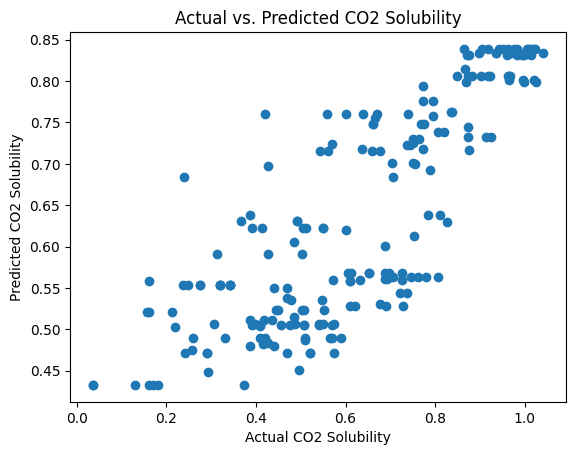

In [ ]:
# Visualize actual vs. predicted values
plt.scatter(y_test, preds)
plt.xlabel("Actual CO2 Solubility")
plt.ylabel("Predicted CO2 Solubility")
plt.title("Actual vs. Predicted CO2 Solubility")
plt.show()